<a href="https://colab.research.google.com/github/Umesh1307/Email-Campaign-Effectiveness-Prediction-Supervised-Classification-Capstone-Project-/blob/main/Email_Campaign_Effectiveness_Prediction_(Supervised_Classification_Capstone_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Campaign Effectiveness Prediction**

---



# **Problem Statement:**

---


## Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

---



## 😇 Before Delving deep straight into the coding part, let's understand the problem statement together 😇

---

### Electronic mail (or E-mail or email) is an Internet service that allows people who have an e-mail address (accounts) to send and receive electronic letters. Those are much like postal letters, except that they are delivered much faster than snail mail when sending over long distances, and are usually free.
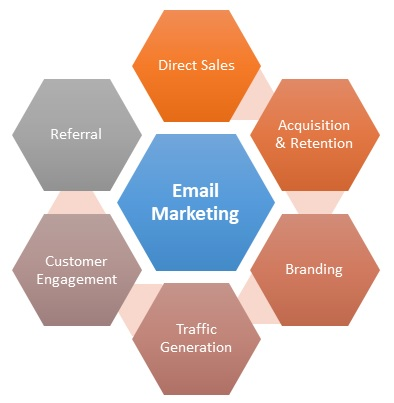

Curious about email marketing [click the link](https://simple.wikipedia.org/wiki/E-mail)
---


---
# Definitions of Attributes
--- 
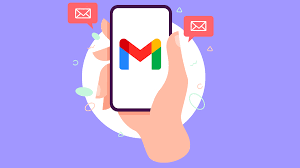
### The data has the following features:
### 1. Email_ID - This column contains the email ids of individuals.

### 2. Email_type - Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or sales email.

### 3. Subject_Hotness_Score - It is the subject-line effectiveness score.

### 4. Email_Source - It represents the source of the email like sales,marketing or product type email.

### 5. Email_Campaign_Type - Campaign type

### 6. Total_Past_Communications - This column contains the previous mails from the source.

### 7. Customer_Location - Categorical data which explains the different demographic location of the customers.

### 8. Time_Email_sent_Category - It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slot.

### 9. Word_Count - It contains the no.of words in the mail.

### 10. Total_Links - Total links in the email body.

### 11. Total_Images - The banner images in the email body.

### 12. Email_Status - It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.
--- 


# Objective of Project:
--- 
* ###  The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

* ###  In addition to the ML Model prediction, we also analyzed what all features can help us in getting the Email status to be not ignored by the customers.
--- 

# Process Outline:
--- 
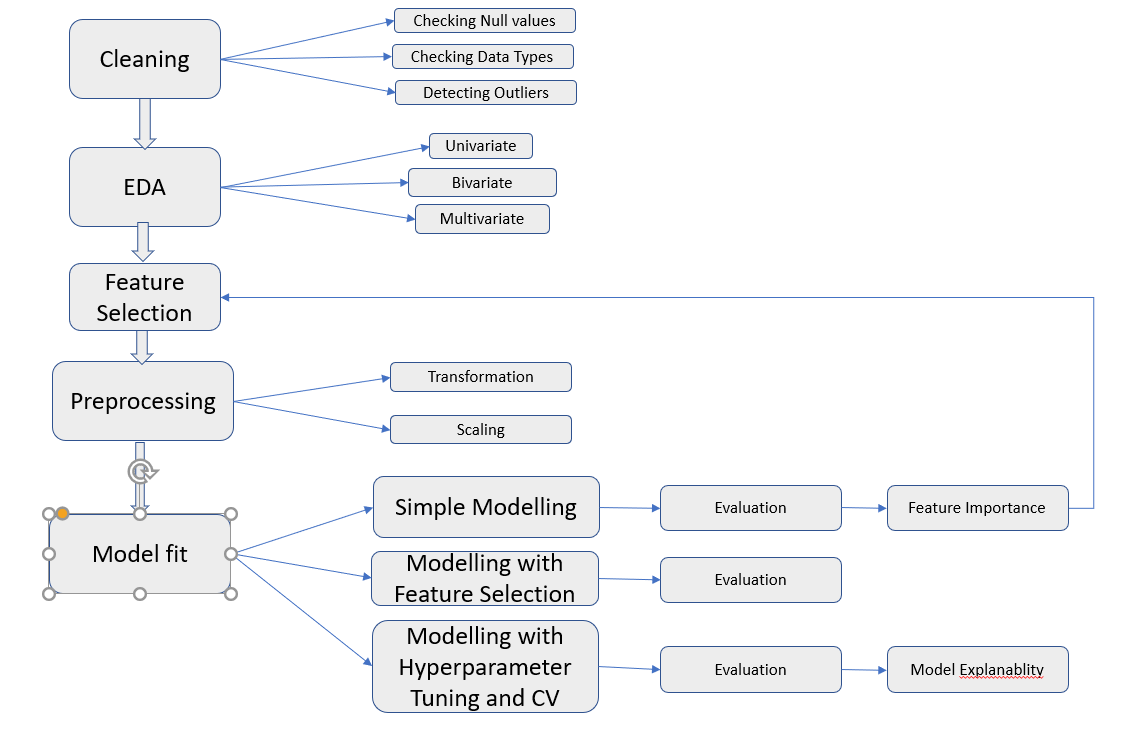

# *STEP 1: LOADING THE DATASET*

In [ ]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import pylab
import missingno as mno
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting drive with google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
email_df=pd.read_csv("/content/drive/MyDrive/Almabetter Project/Capstone - Projects/Module 4 Supervised ML Classification/data_email_campaign.csv")

In [ ]:
# Let's have a look at the head of dataset
email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
# Let's use the colab data table feature to visualize explictly! This feature was new one for me :)
from google.colab.data_table import DataTable
DataTable(email_df)

# A few interesting features of the data table display:😇

---


* ### Clicking the Filter button in the upper right allows you to search for terms or values in any particular column.

* ### Clicking on any column title lets you sort the results according to that column's value.

* ### The table displays only a subset of the data at a time. You can navigate through pages of data using the controls on the lower right.

---




In [ ]:
# Checking the tail of the dataset:)
email_df.tail(3)

In [ ]:
# Checking the shape of the dataset:)
print(f"The Shape of dataset is {email_df.shape} There are {email_df.shape[0]} rows and {email_df.shape[1]} columns")

# Information understanding:

---


### We will be using pandas info method and checking the information about the features, about their datatypes (float, integer, object, datetime, null(missing) or non-null(non-missing), total number of entities in each features.

---




In [ ]:
# Let's have a look at the data type of the features.
email_df.info()



---


# Observations:

---

* ### There are in total 11 variables out of which 10 are independent variables and 1 is dependent which is our target variable.

* ### Categorical Data:
### Out of all the features we have a total of 6 categorical feature variables.
1. * Email_Type
2. * Email_source_Type
3. * Customer_location
4. * Email_Campaign_type
5. * Time_Email_Sent_Catagory
6. * Email_Satus

* ### Target Variable: Email_Status Out of these categorical variables, Email_Status is our target variable which shows 3 different statuses as “Ignored”, “Read” and “Acknowledged”.

* ### There are five numerical or continuous features namely 
1. * "Subject_Hotness_Score" 
2. * "Total_Past_Communications", 
3. * "Word_Count", 
4. * "Total_Links", 
5. * "Total_Images".

* ### There are null values in Customer_Location, Total_Past_Communications, Total_Links, Total_Images features.



---




# *Cleaning, Transforming, Null Value Treatment:*

---


* ## cleaning:

### In this process or step we will be removing undesired features, unwanted prefixes, suffixes we will be having in our data.

* ## Transforming:

### In this step we will transform the datatype of given features to the desired datatype.

* ## Null Value Treatment:
### Here we will be using pandas isnull method to check the presence of null values and if they exist we will be filling them out with appropriate logical reasons and calculation.

---



In [ ]:
# checking if there is any null value in dataset
email_df.isnull().any()

In [ ]:
# Calculating the total number of null values inside each features
email_df.isnull().sum()

In [ ]:
# Let's have a look at the missing values matrix
ax=mno.matrix(email_df, figsize = (12, 5))
plt.title("Missing Values Matrix")
plt.show()

In [ ]:
## Lets go and see the percentage of missing values
email_df.isnull().mean()

In [ ]:
# Check for duplicates
duplicate_df = email_df[email_df.duplicated()]
duplicate_df



---


# Observations:

---
* ### There are null values in four features namely, customer_location, total_past_communication, Total_links, Total_images.
* ### There are no duplicate values found!

---




# *EXPLORATORY DATA ANALYSIS :*
### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.
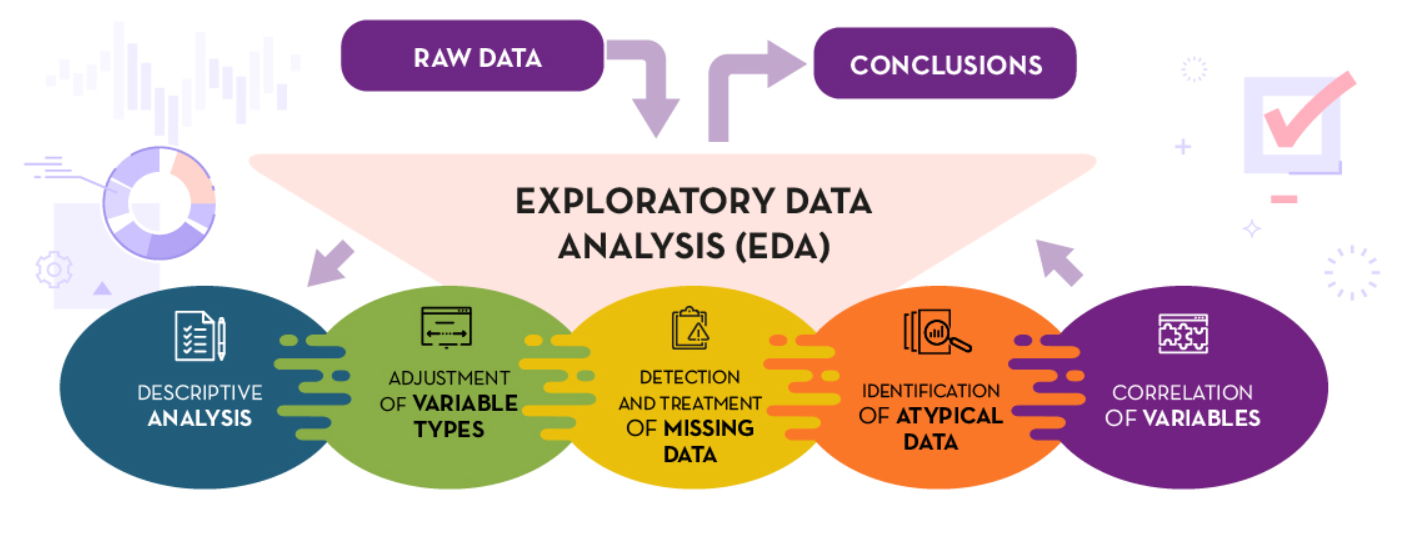


[Read here more about exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)
---





---


# *DESCRIPTIVE STATISTICAL ANALYSIS*

---
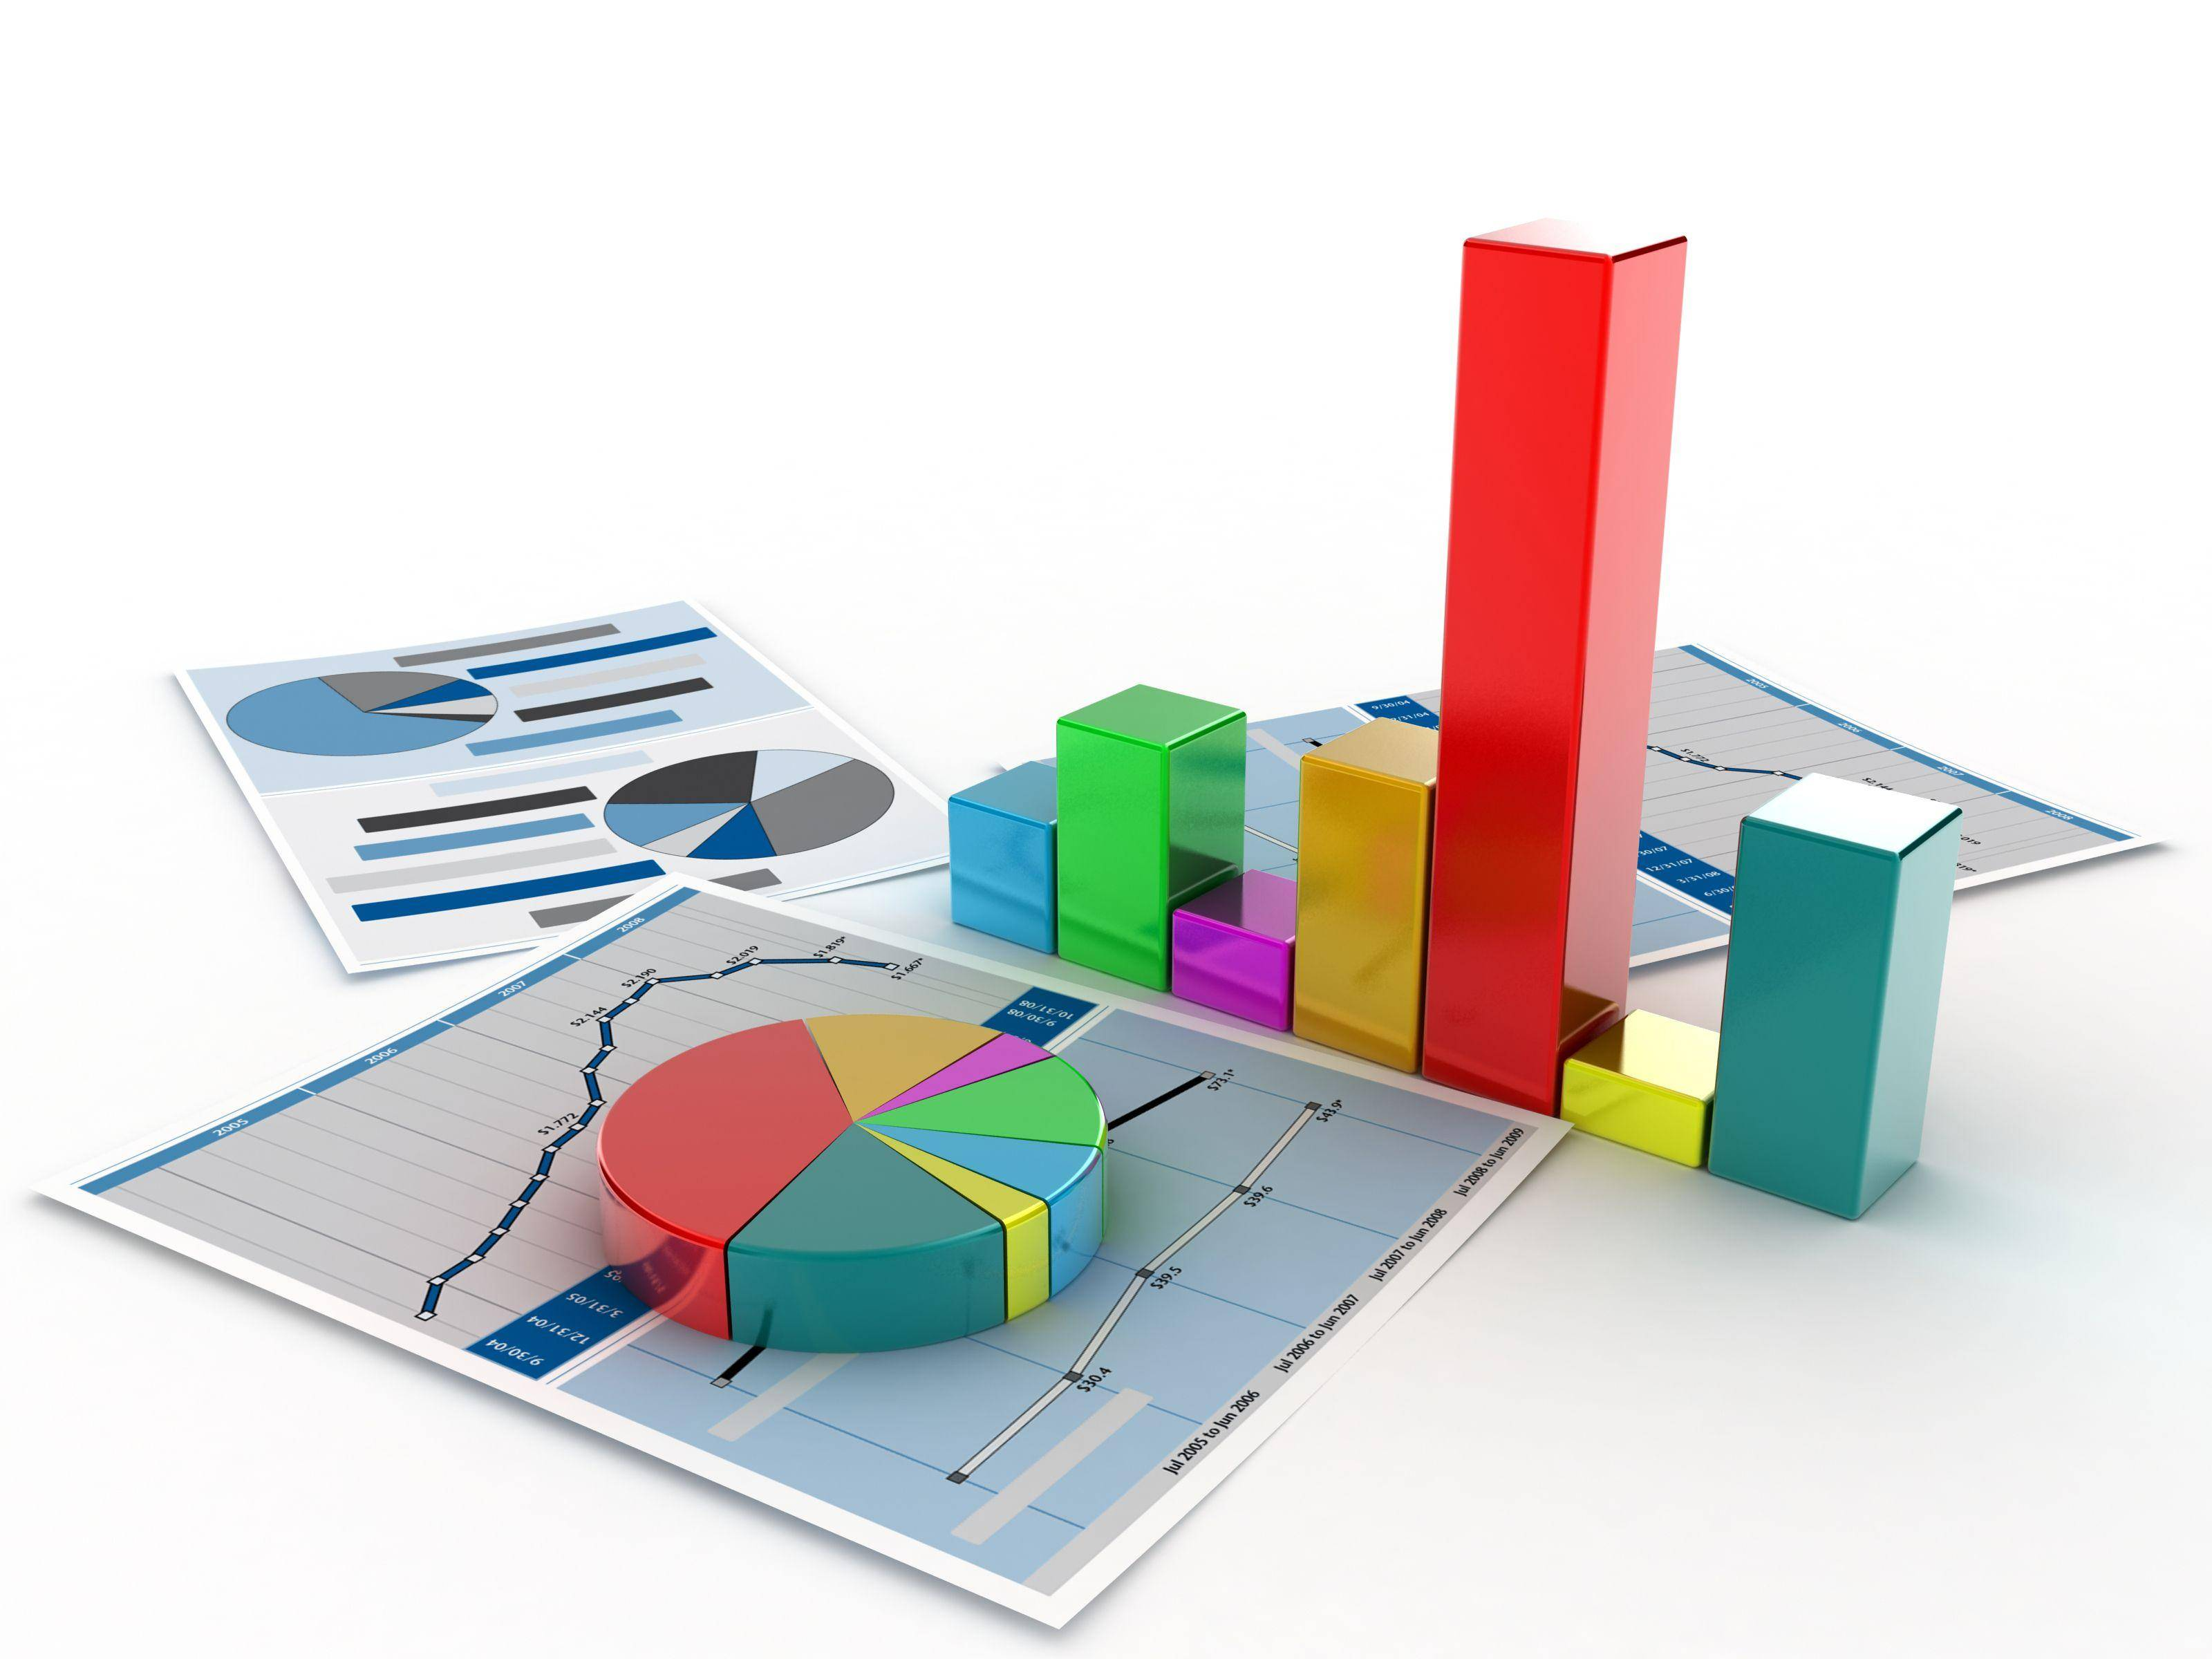

### Here we will be using pandas describe method to have an intution about the basic behaviour of data, furthermore we will use pandas profilling to have a more understanding of the data.




---



In [ ]:
# Let's see the descriptive statistics for numerical features
from google.colab import data_table                           # Importing the datatable extension of google colab.
email_df_describe=email_df[['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Links','Total_Images']].describe().round(2) # Selcting numerical columns only
email_df_describe



---


# Observations:

---

* ### Subject Hotness Score is float value ranges from 0 to 5, where 0 is not hot, 5 is very hot. The average subject hotness score for the given data set is around 1.10



* ### Average total past communications is around 29. maximum total past communications are around 67 and the minimum is 0.



* ### Average word count is around 700 words. An email was sent with maximum words of around 1316 words. An email was sent with minimum words around 40 words.



* ### Average total links sent is around 11 links, and the maximum total links sent is around 49 links, the minimum is 1 link.



* ### Average total images sent through an email is around 4 images. The maximum total images sent are around 45 images.

---






---


# *Null Value Imputation*:

### Here we will be understanding the data distribution at first, then, we will deciding which matrics to be used for missing value imputataion.

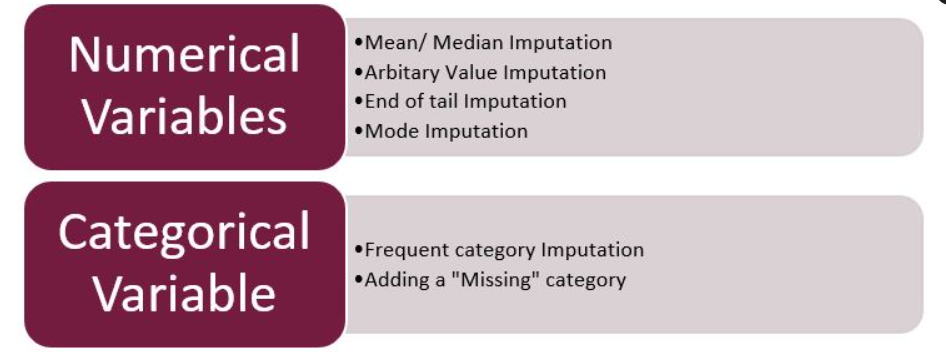
---




In [ ]:
# selecting numeric features from data set
numeric_features = email_df[['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Links','Total_Images']].describe().columns

In [ ]:
numeric_features

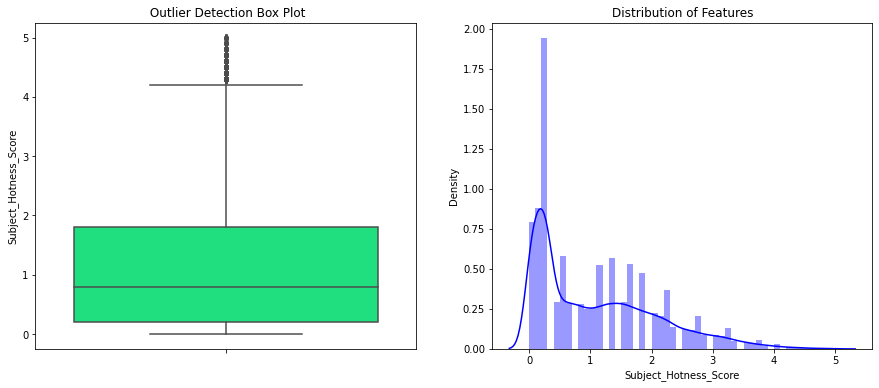

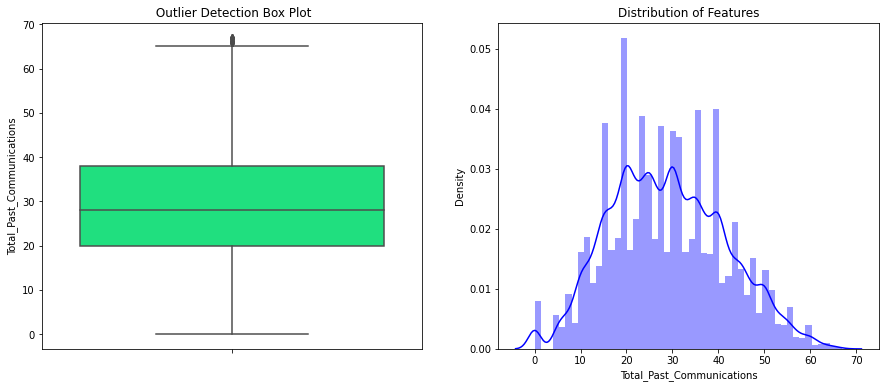

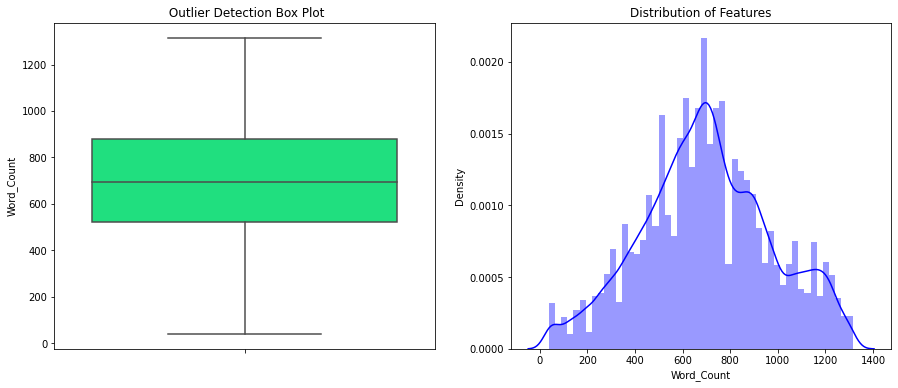

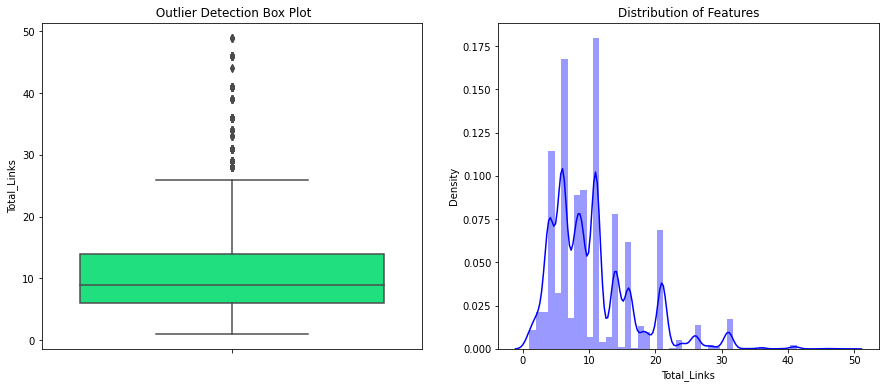

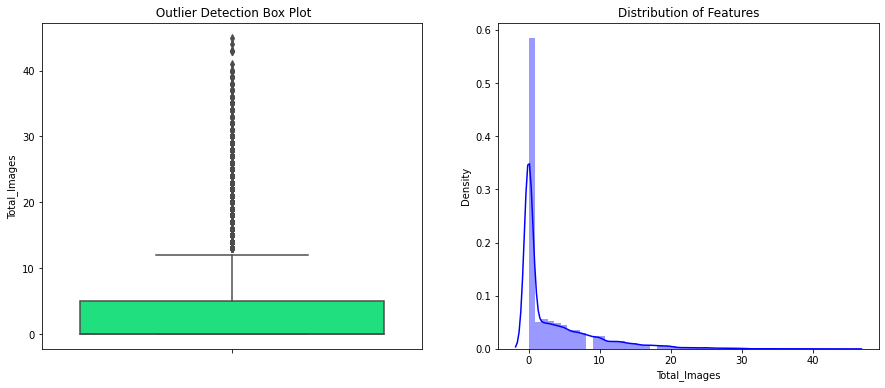

In [ ]:
# Plotting the distribution of the numerical features
for var in numeric_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=email_df[var], color='#00FF7F')
    fig.set_title(' Outlier Detection Box Plot')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(email_df[var].dropna(),color='blue')
    fig.set_title("Distribution of Features")
    fig.set_xlabel(var)
    plt.show()



---


# Observations:

---

* ### We observe that 2 features i.e. “ Word Count” and “Total_Past Communications” follow a normal distribution. 

* ### The rest of the features were highly skewed to the left.

* ### As we can observe the "Total_Past_Communications" is symmetricaly distributed so we can use mean value for imputing missing values for this feature.

* ### Since the "Total_Links" is not normally distributed we will use Mode to impute missing value for this feature.

* ### Since the "Total_Images" is not normally distributed and highly rightly skewed, we will use Mode to impute missing value for this feature.

* ### There are outliers in Subject_Hotness_Score,Total_Links and Total_Images and the distribution of these features are right skewed in nature. There are also a few outliers in Total_Past_Communication which has a normal distribution .
---



In [ ]:
# Imputting null values for total past communications feature with mean
print('Number of missing values before imputing is = ',email_df['Total_Past_Communications'].isnull().sum())
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(),inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Past_Communications'].isnull().sum())

Number of missing values before imputing is =  6825
Number of missing values after imputing is =  0


In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_df['Total_Links'].isnull().sum())
email_df['Total_Links'].fillna(email_df['Total_Links'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Links'].isnull().sum())

Number of missing values before imputing is =  2201
Number of missing values after imputing is =  0


In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_df['Total_Images'].isnull().sum())
email_df['Total_Images'].fillna(email_df['Total_Images'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Images'].isnull().sum())

Number of missing values before imputing is =  1677
Number of missing values after imputing is =  0




---


# Outlier Detection:

---


### Here we will be using Plotly boxplot for the numerical feature to find out the outlier. 

### Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample. 

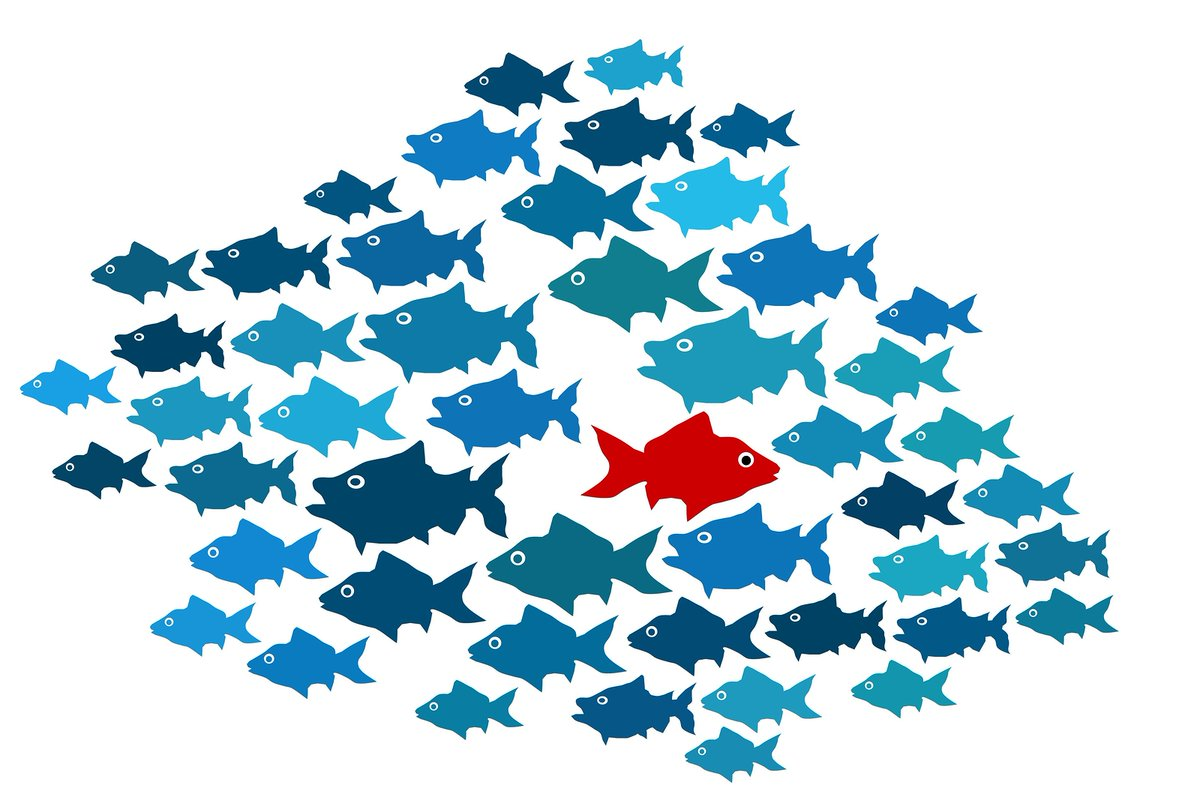

[read here about outlier detection](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561)

---



In [ ]:
# Calculating the outlier for numerical features
trace0 = go.Box(
    y=email_df['Subject_Hotness_Score'],
    x=email_df['Email_Status'],
    name='Email Status vs Subject Hotness Score',
    marker=dict(
        color='#3D9970'
    )
)
trace1 = go.Box(
    y=email_df['Total_Past_Communications'],
    x=email_df['Email_Status'],
    name='Email_Status Vs Total Past Communications',
    marker=dict(
        color='#FF4136'
    )
)
trace2=go.Box(
    y=email_df['Word_Count'], 
    x=email_df['Email_Status'],
    name='Email Status Vs Word Count'
)

trace3=go.Box(
    y=email_df['Total_Links'],
    x=email_df['Email_Status'],
    name='Email Status Vs Total Links'
)    

trace4=go.Box(
    y=email_df['Total_Images'],
    x=email_df['Email_Status'],
    name='Email Status Vs Total Images'
)

fig = make_subplots(rows=1, cols=5,  x_title='Email Status',
                    y_title='Values',
                    subplot_titles=("Subject Hotness Score",
                                                    "Total Past Communications","Word Count",
                                                    "Total Links","Total Images"))
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 1, 4)
fig.append_trace(trace4, 1, 5)

fig.show()




---


# Observations:

---


* ## ***Subject_Hotness_Score :*** 
### All Email_Status i.e 0,1,2 have outliers. 0 have highest median and 1,2 are right skewed. It is observed that the Subject_Hotness_Score for read/acknowledged mails are much lower.

* ## ***Total_Past_Communications :***
### 0,2 have outliers and 2 have highest median .

* ## ***Total_Links :***
### 0,1,2 all have outliers,All have the same median but 0,2 have higher variance compare to 1.

* ## ***Total_Images :***
### 0,1,2 all have outliers and All have the same median. Hence all the mails have the same range of images.

* ## ***Word_Count :*** 
### Median of 0 is highest. Thus we can understand that ignored mails have higher word count.


---



# *Categorical Data Analysis* :

---
## *Binary vs nominal vs ordinal variables*

### Binary variables (aka dichotomous variables) Yes/no outcomes :
    for instance: Heads/tails in a coin flip,Win/lose in a football game.

### Nominal variables: Groups with no rank or order between them.	
    For instance: Species names, Colors, Brands

### Ordinal variables: Groups that are ranked in a specific order.	
    For instance: Finishing place in a race
                  Rating scale responses in a survey

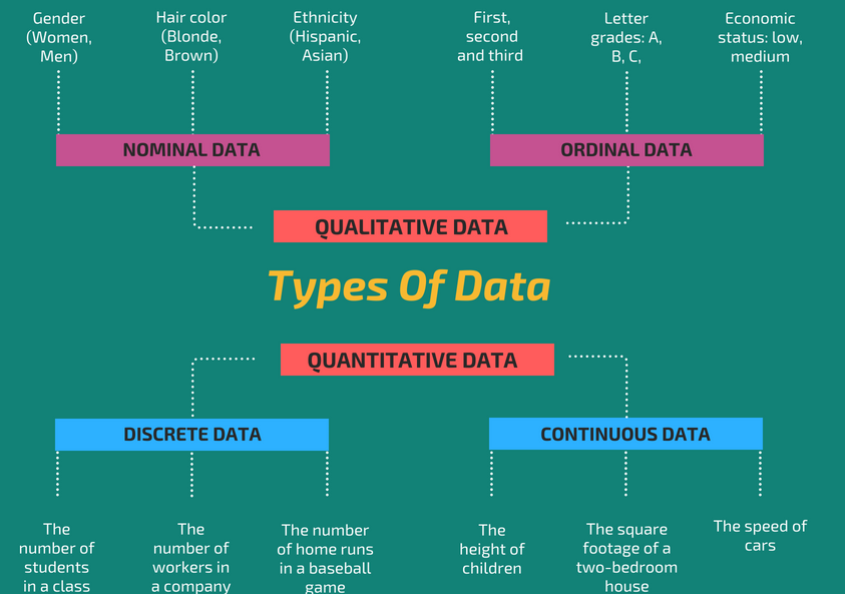

In [ ]:
#creating new dataframe of only categorical columns
categorical_features = email_df.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
categorical_features.drop('Word_Count',axis=1,inplace=True)
categorical_features.head(2)

In [ ]:
# Analyzing the categorical features in given dataset
categorical_features_stats = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total_COunt_Excluding_Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for c in categorical_features.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [categorical_features[c].unique()]
    tmp['Total Count'] = len(list(categorical_features[c].unique()))
    tmp['Total_COunt_Excluding_Null'] = int(categorical_features[c].nunique())
    tmp['Missing Value'] = categorical_features[c].isnull().sum()
    tmp['Missing %'] = (categorical_features[c].isnull().sum()/ len(categorical_features)).round(3)*100
    categorical_features_stats = categorical_features_stats.append(tmp)
    
categorical_features_stats



---


# Observations:

---


* ### As we can see we have 17% missing values in Customer Location.

* ### There is no missing values in any other categorical variable.

* ### Email_Type and Email_Source_Type have 2 categories.

* ### Email_Campaign_Type,Time_Email_sent_Category and Email_Status have 3 Categories

* ### Look at the Variable 'Customer_Location' -- distinct categories are 8 but without nans it is 7

---



In [ ]:
# Calculating the relationship between target variable and categorical features in given data
fig1 = px.histogram(data_frame=email_df, x="Email_Type", color="Email_Status",text_auto=True, 
                    title="Email Type Vs Email Status", barnorm='percent',template="plotly_dark")
fig1.update_layout(barmode='group')

fig2 = px.histogram(data_frame=email_df, x="Email_Source_Type", color="Email_Status",text_auto=True,
                    title="Email Source Type vs Email Status", barnorm='percent',template="presentation")
fig2.update_layout(barmode='group')

fig3=px.histogram(data_frame=email_df, x="Customer_Location", color="Email_Status",text_auto=True,
                  title="Customer Location Vs Email Status",barnorm='percent',template="plotly_dark")
fig3.update_layout(barmode='group')

fig4=px.histogram(data_frame=email_df, x="Email_Campaign_Type", color="Email_Status", text_auto=True,
                  title="Email Campaign Type Vs Email Status", barnorm='percent',template="presentation")
fig4.update_layout(barmode='group')

fig5=px.histogram(data_frame=email_df, x="Time_Email_sent_Category", color="Email_Status", text_auto=True,
                  title="Time Email Sent Category Vs Email Status",barnorm='percent',template="plotly_dark")
fig5.update_layout(barmode='group')

fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()



---


# Observations:

---
* ### As we can observe the distribution of Email_Status is almost similar in all the categories except in Email_Campaign_Type we can see that it shows a totally different trend. 

* ### For Email_Campaign_Type=1 we see that only 10% of customers are ignoring the email and for 2 around 87% customer ignore the emails.


---



# Correlation of Variables:

---
### Correlation is a statistical term describing the degree to which two variables move in coordination with one another. If the two variables move in the same direction, then those variables are said to have a positive correlation. If they move in opposite directions, then they have a negative correlation.
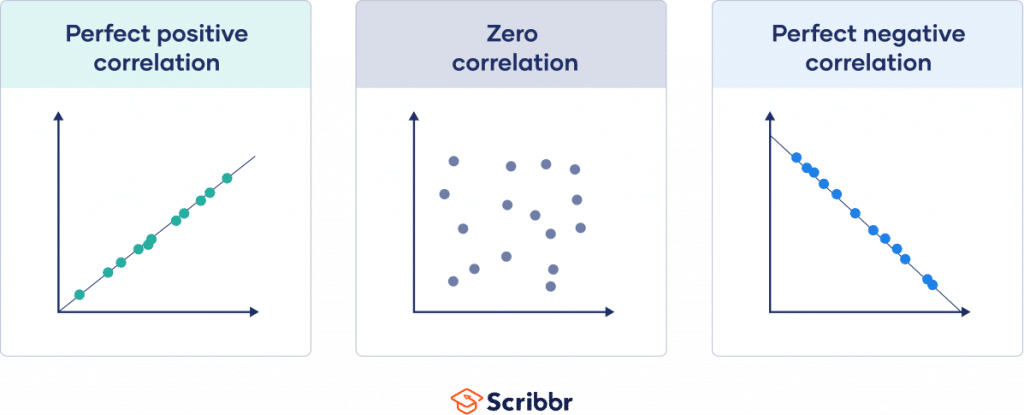

[Read more about Pearson's correlation here](https://www.investopedia.com/terms/c/correlation.asp)


In [ ]:
# Extracting only numerical features from the given dataset
numeric_features=email_df[['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Links','Total_Images']]

In [ ]:
# Calculating the pearson's correlation between features using seaborn heatmap matrix
corr=numeric_features.corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
# Now let's use seaborn heatmap correlation plot
plt.figure(figsize=(12,10))
sns.heatmap(numeric_features.corr(),annot=True,annot_kws={"size":15}, vmin=-1, vmax=1, cmap="gist_rainbow",linewidth=0.5,linecolor='g',square=True)
plt.title("Heatmap Correlation Plot for Numerical Features",fontsize=14)

plt.show()



---


# Observations:

---
* ### So we can observe that the correlation score is 0.75 for Total_Images and Total_Links which on a scale of (-1,1) can be understood as high positive correlation.

* ### Total Past communication and Total link sent are positively related with a Pearson's correlation value of 0.11.

* ### To understand whether this relation holds true, we can plot the selected variables using scatter plots.
---




In [ ]:
# Plotting the correlation between total images and total links with respect to target varible
px.scatter(data_frame=email_df, x="Total_Images",y="Total_Links",
           color="Email_Status",title="Correlation between Total Images and Total Links with Target Variable",
           template="plotly_dark",trendline='ols')



---


# Observations:

---


* ### We can conclude from the above information that there is a high positive correlation between these two features. 

* ### Lets now understand each feature individually.

---



In [ ]:
# comparing the outlier between total links and total images
trace1=go.Box(
    x=email_df['Total_Links'],orientation='h', boxpoints='all',
    name="Total_Links"
)    

trace2=go.Box(
    x=email_df['Total_Images'],orientation='h', boxpoints='all',
    name="Total_Images"
)

fig = make_subplots(rows=1, cols=2, x_title="Values",
                    subplot_titles=("Total Links","Total Images"))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.show()

In [ ]:
# Calculating the percentage of total zero images
zero_total_images=email_df[email_df["Total_Images"]==0].count()["Total_Images"]
total_images=email_df["Total_Images"].count()
Percentage_zero_images=(zero_total_images/total_images)*100
print(f" Percentage of zero images sent is {Percentage_zero_images.round(2)}%")



---


# Observations:

---

* ### When compared to Total_Images, Total_Links has very few outliers.
* ### Since images and links are correlated and most of the values in Total_Images is 0 we will combine both the features.

* ### We already have taken care of null values so we are ready to combine these two features namely total links and total images
---



In [ ]:
# Combining two features 
email_df['Links_Images']=email_df['Total_Links']+email_df['Total_Images']

In [ ]:
#Dropping Total_Images and Total_Links  column
print('Shape of data before dropping ',email_df.shape)
email_df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)
print('Shape of data after dropping ',email_df.shape)

# **Feature Engineering**

### Lets understand the multicollinearity within the numerical featrures.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Listing down new numerical features
new_numerical_features=email_df[["Subject_Hotness_Score","Total_Past_Communications","Word_Count","Links_Images"]]

In [ ]:
calc_vif(new_numerical_features).style.background_gradient(cmap='coolwarm')

### Except Word_Count column all other numeric column have outliers. Since our dependent variable is highly imbalanced so before dropping outliers we should check that it will not going to delete more than 5% of minority class which is Email_Status =1,2

In [ ]:
# Calculating the percentage of minority and majority group
subject_hotness_score_sum=email_df.groupby("Email_Status")["Subject_Hotness_Score"].sum().reset_index()
total_links_images=email_df.groupby("Email_Status")["Links_Images"].sum().reset_index()
total_communications=email_df.groupby("Email_Status")["Total_Past_Communications"].sum().reset_index()

In [ ]:
# Let's plot the percentage of majority and minority class in subject hotness score
total_subject_hotness_score=subject_hotness_score_sum["Subject_Hotness_Score"].sum()

# Calculating the sum of subject hotness score
subject_hotness_score_sum["percentage_subject_hotness_score"]=(subject_hotness_score_sum["Subject_Hotness_Score"]/total_subject_hotness_score).round(2)*100

# Calculating the percentage of subject hotness score with email status
subject_hotness_score_sum['percentage_subject_hotness_score']=subject_hotness_score_sum["percentage_subject_hotness_score"].apply(lambda x:"{0:1.1f}%".format(x))

# Using plotly let's visulize it
fig1=px.bar(data_frame=subject_hotness_score_sum, x="Email_Status", color="Email_Status",
       y="Subject_Hotness_Score", text="percentage_subject_hotness_score",
       title="Email Status Vs Subject Hotness Score",template="plotly_dark",width=1000,height=500)

fig1.update_xaxes(tick0=0, dtick=1)



""" Plotting the percentage of majority and minority class for the links images feature"""

# Let's plot the percentage of majority and minority class in Links_Images
total_links_images_=total_links_images["Links_Images"].sum()

# Calculating the sum of Links_Images
total_links_images["percentage_total_links_images"]=(total_links_images["Links_Images"]/total_links_images_).round(2)*100

# Calculating the percentage of Links_Images with email status
total_links_images['percentage_total_links_images']=total_links_images["percentage_total_links_images"].apply(lambda x:"{0:1.1f}%".format(x))

# Using plotly let's visulize it
fig2=px.bar(data_frame=total_links_images, x="Email_Status", color="Email_Status",
       y="Links_Images", text="percentage_total_links_images",
       title="Email Status Vs Links Images",template="presentation",width=1000,height=500)

fig2.update_xaxes(tick0=0, dtick=1)



""" Plotting the percentage of majority and minority class for the Total_Past_Communications feature"""



# Let's plot the percentage of majority and minority class in Total_Past_Communications
total_communications_=total_communications["Total_Past_Communications"].sum()

# Calculating the sum of Total_Past_Communications
total_communications["percentage_past_communications"]=(total_communications["Total_Past_Communications"]/total_communications_).round(2)*100

# Calculating the percentage of Total_Past_Communications with email status
total_communications['percentage_past_communications']=total_communications["percentage_past_communications"].apply(lambda x:"{0:1.1f}%".format(x))

# Using plotly let's visulize it
fig3=px.bar(data_frame=total_communications, x="Email_Status", color="Email_Status",
       y="Total_Past_Communications", text="percentage_past_communications",
       title="Email Status Vs Total_Past_Communications",template="plotly_dark", width=1000,height=500,barmode='stack')

fig3.update_xaxes(tick0=0, dtick=1)

fig1.show()
fig2.show()
fig3.show()




In [ ]:
# Total Email Status
total_sum=email_df.groupby("Email_Status").count()["Email_Type"][0]+email_df.groupby('Email_Status').count()['Email_Type'][1]+email_df.groupby('Email_Status').count()['Email_Type'][2]

In [ ]:
# Calculating the percentage of majority and minority class in given data
total_1_2=email_df.groupby('Email_Status').count()['Email_Type'][1]+email_df.groupby('Email_Status').count()['Email_Type'][2]
total_0=email_df.groupby("Email_Status").count()["Email_Type"][0]
print("Percentage of majority class = ",(100*total_1_2/total_sum).round(2))
print("Percentage of minority class = ",(100*total_0/total_sum).round(2))